# Controlling quantum trajectories in a collision model

### This code reproduces Fig. 1 and explains the influence of the reweighting procedure

In [1]:
import qiskit
import matplotlib.pyplot as plt
import numpy as np

from src import collision_hamiltonian, collision_unitary, calculate_full_counting_statistics, magnetization_pattern, analyse_temporal_probability, analyse_observable_histogram, TimeDependentDoob, to_hdf5_from_dict, read_hdf5_to_dict

In [2]:
import qiskit.tools.jupyter
%qiskit_version_table

In [3]:
# standard values
__omega = 1
__kappa = 1

# calculate collisions hamiltonian and unitary
unbiased_hamiltonian = collision_hamiltonian(omega=__omega, kappa=__kappa)
unbiased_unitary = collision_unitary(hamiltonian=unbiased_hamiltonian)

calculate the exact, unbiased statistics and display them with respect to 
1) Probability of the individual trajectory $P(\mathbf{k})$
2) Probability of the $n$-th collision resukting in 1-outcome $P(k_n=1)$
3) Probability of certain overlap/"energy"-value

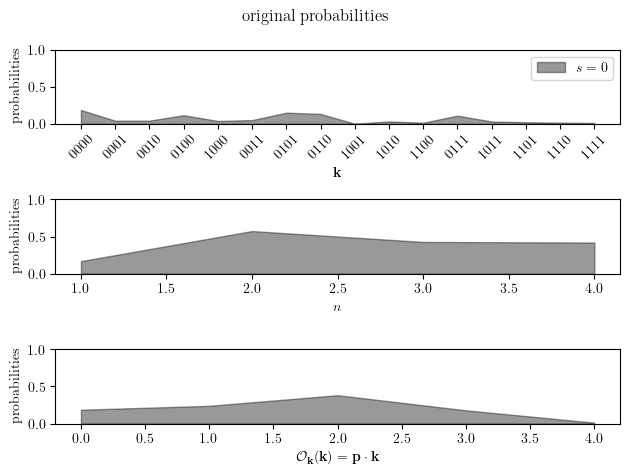

In [4]:
# perparations for uniform field 
NCOLL = 4
biasing_field = magnetization_pattern(NCOLL=NCOLL)

# calculate Data and plot it
fig1, axs1 = plt.subplots(nrows=3)
DoobObj = TimeDependentDoob(collision_unitary=unbiased_unitary, biasing_pattern=biasing_field,
                            s_val=0)
fcs = calculate_full_counting_statistics(Kraus_list=DoobObj.get_undoobed_Kraus_ops(),
                                         biasing_pattern=biasing_field, s_val=0)
axs1[0].fill_between(np.arange(fcs.index.size),
                        fcs, 
                        color='k', alpha=0.4, label=f'$s={0}$')
axs1[0].set_xticks(np.arange(fcs.index.size), fcs.index, rotation=45)

tpd = analyse_temporal_probability(full_counting_statistics=fcs)
axs1[1].fill_between(np.arange(1, NCOLL + 1), tpd, color='k', alpha=0.4)

opd = analyse_observable_histogram(full_counting_statistics=fcs,
                                                    biasing_pattern=biasing_field)
axs1[2].fill_between(opd.index, 
                        opd['$P_s(O)$'], 
                        color='k', alpha=.4)

# Add some annotations, etc.
fig1.suptitle('original probabilities')
axs1[0].set_xlabel(r'$\mathbf{k}$')
axs1[0].legend()
axs1[1].set_xlabel(r'$n$')
axs1[2].set_xlabel(r'$\mathcal{O}_{\mathbf{k}}(\mathbf{k}) = \mathbf{p} \cdot \mathbf{k}$')
for ax in axs1:
    ax.set_ylabel('probabilities')
    ax.set_ylim([0,1])

fig1.tight_layout()

now do the same for a chosen value of $s\neq 0$

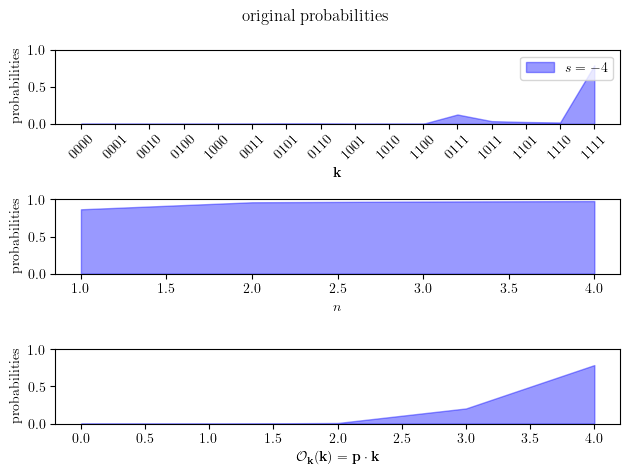

In [5]:
# ------------- choose s-value --------------- #
s_val = -4

# calculate Data and plot it
fig1b, axs1b = plt.subplots(nrows=3)
DoobObj = TimeDependentDoob(collision_unitary=unbiased_unitary, biasing_pattern=biasing_field,
                            s_val=s_val)
fcs = calculate_full_counting_statistics(Kraus_list=DoobObj.get_undoobed_Kraus_ops(),
                                         biasing_pattern=biasing_field, s_val=s_val)
axs1b[0].fill_between(np.arange(fcs.index.size),
                        fcs, 
                        color=f"{'r' if s_val > 0 else 'b'}", alpha=0.4, label=f'$s={s_val:.0f}$')
axs1b[0].set_xticks(np.arange(fcs.index.size), fcs.index, rotation=45)

tpd = analyse_temporal_probability(full_counting_statistics=fcs)
axs1b[1].fill_between(np.arange(1, NCOLL + 1), tpd, color=f"{'r' if s_val > 0 else 'b'}", alpha=0.4)

opd = analyse_observable_histogram(full_counting_statistics=fcs,
                                                    biasing_pattern=biasing_field)
axs1b[2].fill_between(opd.index, 
                        opd['$P_s(O)$'], 
                        color=f"{'r' if s_val > 0 else 'b'}", alpha=.4)

# Add some annotations, etc.
fig1b.suptitle('original probabilities')
axs1b[0].set_xlabel(r'$\mathbf{k}$')
axs1b[0].legend()
axs1b[1].set_xlabel(r'$n$')
axs1b[2].set_xlabel(r'$\mathcal{O}_{\mathbf{k}}(\mathbf{k}) = \mathbf{p} \cdot \mathbf{k}$')
for ax in axs1b:
    ax.set_ylabel('probabilities')
    ax.set_ylim([0,1])

fig1b.tight_layout()

and now compare these two against each other

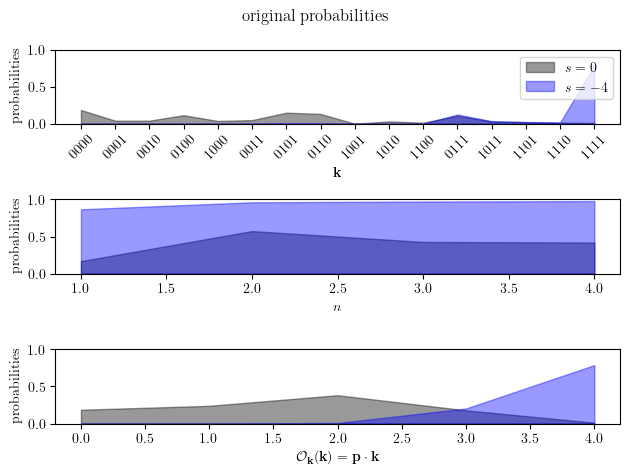

In [6]:
# ------------- choose s-value --------------- #
s_vals = [0, s_val]

# calculate Data and plot it
fig1c, axs1c = plt.subplots(nrows=3)

for s in s_vals:
    if s == 0:
        color = 'k'
    elif s < 0:
        color='b'
    else:
        color='r'

    DoobObj = TimeDependentDoob(collision_unitary=unbiased_unitary, biasing_pattern=biasing_field,
                            s_val=s)
    fcs = calculate_full_counting_statistics(Kraus_list=DoobObj.get_undoobed_Kraus_ops(),
                                             biasing_pattern=biasing_field, s_val=s)
    axs1c[0].fill_between(np.arange(fcs.index.size),
                            fcs, 
                            color=color, alpha=0.4, label=f'$s={s:.0f}$')
    axs1c[0].set_xticks(np.arange(fcs.index.size), fcs.index, rotation=45)

    tpd = analyse_temporal_probability(full_counting_statistics=fcs)
    axs1c[1].fill_between(np.arange(1, NCOLL + 1), tpd, color=color, alpha=0.4)

    opd = analyse_observable_histogram(full_counting_statistics=fcs,
                                                        biasing_pattern=biasing_field)
    axs1c[2].fill_between(opd.index, 
                            opd['$P_s(O)$'], 
                            color=color, alpha=.4)

# Add some annotations, etc.
fig1c.suptitle('original probabilities')
axs1c[0].set_xlabel(r'$\mathbf{k}$')
axs1c[0].legend()
axs1c[1].set_xlabel(r'$n$')
axs1c[2].set_xlabel(r'$\mathcal{O}_{\mathbf{k}}(\mathbf{k}) = \mathbf{p} \cdot \mathbf{k}$')
for ax in axs1c:
    ax.set_ylabel('probabilities')
    ax.set_ylim([0,1])

fig1c.tight_layout()

Save the ploted data in Fig. 1

In [7]:
tpds = dict()

for s in s_vals:
    DoobObj = TimeDependentDoob(collision_unitary=unbiased_unitary, biasing_pattern=biasing_field,
                            s_val=s)
    fcs = calculate_full_counting_statistics(Kraus_list=DoobObj.get_undoobed_Kraus_ops(),
                                             biasing_pattern=biasing_field, s_val=s)
    tpds[f's={s:.0f}'] = analyse_temporal_probability(full_counting_statistics=fcs)
    
to_hdf5_from_dict(r'./data/time_resolved_data.h5', tpds)

In [8]:
read_hdf5_to_dict(r'./data/time_resolved_data.h5')

{'s=-4': array([0.86752986, 0.96212676, 0.97196186, 0.97826885]),
 's=-4_parameters': {},
 's=0': array([0.16919683, 0.57441854, 0.42792841, 0.42000839]),
 's=0_parameters': {}}